<a href="https://colab.research.google.com/github/Vyshnavi2023/Deep_Learning/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:49<00:00, 23.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,BatchNormalization,Dropout

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
zip_ref.close()

In [ ]:
# # generators
# train_data = keras.utils.image_dataset_from_directory(
#     directory = '/content/dogs_vs_cats/train',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=16,
#     image_size=(224,224)
# )

# validation_data = keras.utils.image_dataset_from_directory(
#     directory = '/content/dogs_vs_cats/test',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=16,
#     image_size=(224,224)
# )

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example of setting up the ImageDataGenerator with resizing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming your data is stored in directories:
train_data = train_datagen.flow_from_directory(
    '/content/dogs_vs_cats/train',
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'
)

validation_data = validation_datagen.flow_from_directory(
    '/content/dogs_vs_cats/test',
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
#load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)


early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=1,
    verbose=1,
    mode='max',
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_data, validation_data=validation_data,epochs=10,callbacks=[early_stopping])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 175ms/step - accuracy: 0.8521 - loss: 0.3458 - val_accuracy: 0.9234 - val_loss: 0.1936
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 170ms/step - accuracy: 0.9365 - loss: 0.1557 - val_accuracy: 0.9326 - val_loss: 0.1651
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.9468 - loss: 0.1315 - val_accuracy: 0.9282 - val_loss: 0.1610
Epoch 3: early stopping


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,373,829 (92.98 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 6,439,428 (24.56 MB)

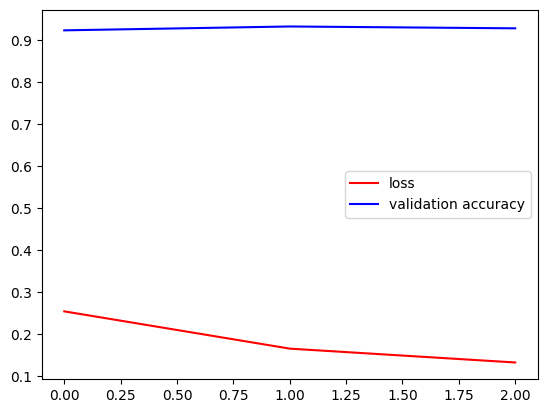

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save("cats_vs_dogs.keras")

In [ ]:
model.save("cats_vs_dogs.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: Cat


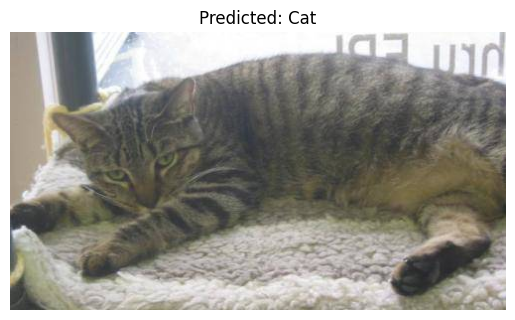

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model (if not already in memory)
# model = tf.keras.models.load_model('path_to_your_trained_model')  # Uncomment and load the model if needed

# Function to preprocess image
def preprocess_image(img_path):
    # Load the image with the target size VGG16 expects (224, 224)
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert the image to a numpy array and normalize the pixel values to [0, 1]
    img_array = image.img_to_array(img) / 255.0

    # Add a batch dimension (model expects (batch_size, height, width, channels))
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Test with an image file path (update with your image path)
img_path = '/cat.10017.jpg'  # Update with your image file path

# Preprocess the image
img_array = preprocess_image(img_path)

# Make a prediction using the model
prediction = model.predict(img_array)

# Interpret and display the prediction result
if prediction[0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")

# Display the uploaded image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {'Dog' if prediction[0] > 0.5 else 'Cat'}")
plt.axis('off')
plt.show()


# streamlit

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

def main():
    # Load the trained model
    model_path = '/content/cats_vs_dogs.h5'
    model = tf.keras.models.load_model(model_path)

    # Define the image size expected by the model
    img_size = (256, 256)

    # Streamlit app
    st.title("Dog vs Cat Image Classifier")

    uploaded_file = st.file_uploader("Choose an image...", type="jpg")

    if uploaded_file is not None:
        # Display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image.", use_column_width=True)

        # Preprocess the image for the model
        img_array = np.array(image.resize(img_size))
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make prediction
        prediction = model.predict(img_array)

        # Display the prediction result
        class_names = ['Cat', 'Dog']
        threshold = 0.50  # Adjust this threshold based on your needs
        predicted_class = 'Dog' if prediction > threshold else 'Cat'
        confidence = prediction if predicted_class == 'cat' else 1 - prediction

        st.write(f"Prediction: {predicted_class} (Confidence: {confidence.item():.2%})")
        st.write("Raw Prediction Array:", prediction)

if __name__ == "__main__":
    main()
""")

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.124.176.162


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.176.162:8501

Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')